In [1]:
# BUILD RECOMMENDATION SYSTEM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# user interface
import tkinter as tk
from tkinter import simpledialog    
ROOT = tk.Tk()
ROOT.withdraw()

import re

In [ ]:
# get the file with the movies 

!wget tmdb_5000_movies.csv # get the wget.exe to your path !!!! 

In [2]:
# read the csv file 
df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# retrieve the first raw of data 
# the headers.....

x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [4]:
# bring the genres column TO READ IT
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [5]:
# bring the keywords columm TO READ IT
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [6]:
# METHOD THAT LOADS THE DATA 
# AND CREATES SINGLE STRINGS SEPARATED WITH A SINGLE SPACE ONLY WITH THE WORDS NEEDED FOR THE TF-IDF

def genres_keywords_to_string(row):    
    genres = json.loads(row['genres']) # convert the json list of string intos a format you can use --> A PYTHON LIST OF PYTHON DICTIONAIRES
    genres = ' '.join(''.join(jj['name'].split()) for jj in genres) # # the tf -idf CountVectorizer REQUIRES A LIST OF STRINGS
    
    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(jj['name'].split()) for jj in keywords)   
    
    return "%s %s" % (genres, keywords)

In [7]:
# create a new string representation of each movie that possesses both the words from genres and keywords 
df['string'] = df.apply(genres_keywords_to_string, axis=1)
df['string']

0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
4798    Action Crime Thriller unitedstates–mexicobarri...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TVMovie date loveatfirsts...
4801                                                     
4802      Documentary obsession camcorder crush dreamgirl
Name: string, Length: 4803, dtype: object

In [8]:
# create instance for the tf-idf vectorizer
tfidf = TfidfVectorizer(max_features=2000)


# create a Data matrix from the overviews
# Datamatrix is a two-dimensional barcode consisting of black and white modules arranged in a grid. 
X = tfidf.fit_transform(df['string'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [9]:
# generating a mapping from movie title -> index (in df)
movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [10]:
# keep asking until there is a valid movie title
# and then index it
while True: 
               
    # ask the user to give you a movie title
    ask_user = str(simpledialog.askstring(title="Movie Name", prompt="Enter a movie:"))                            
    
    searching = re.search(ask_user, ' '.join([str(value) for value in movie2idx.items()]), re.IGNORECASE) #searching for the movie in the items of pandas Series of movies
    
    # check if the user gave a valid movie title
    if searching:
        print("Found it")
        ask_user = str(searching.group())
        idx = movie2idx[ask_user] # the index of the movie we want to find
        print(f"\n{ask_user} indexed in position:", idx)
        break

Found it

Highlander indexed in position: 2490


In [11]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [12]:
# print the query vector
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# compute the cosine similarity between the query vector and every vector in X
scores = cosine_similarity(query, X)
scores

array([[0.05951455, 0.0624357 , 0.06673489, ..., 0.        , 0.        ,
        0.        ]])

In [14]:
# make it an 1-D array
scores = scores.flatten()

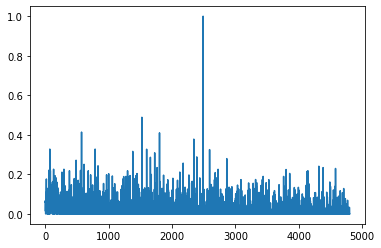

In [15]:
# plot the scores
plt.plot(scores)

In [16]:
# numpy.argsort() function is used to perform an indirect sort along the given axis using the algorithm specified by the kind keyword. 
# It returns an array of indices of the same shape as arr that that would sort the array.
(-scores).argsort() 

array([2490, 1524,  572, ..., 2362, 2323, 4802], dtype=int64)

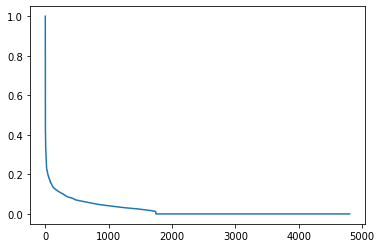

In [17]:
plt.plot(scores[(-scores).argsort()])

In [18]:
# retreieve our matches
recommendation_indices = (-scores).argsort()[:5]
recommendation_indices

array([2490, 1524,  572, 1802, 2343], dtype=int64)

In [19]:
# convert indices to movie titles
print(f"5 Recommended titles for {ask_user}: \n", df['title'].iloc[recommendation_indices])

5 Recommended titles for Highlander: 
 2490                         Highlander
1524              George and the Dragon
572                                Hook
1802    Highlander: The Final Dimension
2343                Conan the Destroyer
Name: title, dtype: object
